In [1]:
%pylab inline
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
#objects
class particle(object):
    #Particle object with a few parameters and two functions for dynamics.
    def __init__(self, start_pos, start_velocity):
        self.r = array(start_pos).astype(float)
        self.v = array(start_velocity).astype(float)

    def get_a(self, p):
        #Takes another particle. Returns the acceleration vector on self due to gravity.
        r = self.r - p.r
        if count_nonzero(r) is 0: #trying to compare same particle
            return 0
        r_mag = (linalg.norm(r))

        F = (G / r_mag**3) * -r  #attractive force
        F += (C / r_mag**4) * r   #repulsive force
        a = F
        return a
    
    def update(self, a):
        #Takes acceleration and updates position
        self.v += a*dt
        self.r += self.v*dt

In [3]:
# Check for crazy conditions and remove a particle if it leaves the scene.
def check(particles):
    ok = True
    for particle in particles:
        position = particle.r
        if not position.any():
            ok = False
        
        for coord in position:
            if abs(coord) > 200:
                ok = False
    return ok

Initialize
===

In [4]:
#constants
G = 5e6
C = 1e7
dt = 1e-5
duration = 0.01

#Start conditions
particles=[]

# Spiral 
r = 15.0
thetas = linspace(0, 2*pi-2*pi/50, 50)
for theta in thetas:
    particles.append(particle(start_pos=[50+r*cos(theta), 50+ r*sin(theta)], start_velocity=[-100*r*sin(theta), 100*r*cos(theta)]))

# Random params
# for i in range(nparticles):
#    particles.append(particle(start_pos=[randint(0,100), randint(0,100)], start_velocity=[0,0]))

#initialize
ok = True
data = []
t=0
ndx = 0

Main Loop
===

In [5]:
# You can interrupt this loop at any time, and the data will be preserved. 
# Run the following cell to get a plot of available data.

data_log_interval = 10

print('starting sim with duration = ' + str(duration) + ' and dt = %.5f' %dt)
print('initial number of particles = %d' % len(particles))
start_time = time.time()

abs_max_x=particles[0].r[0]; abs_max_y=particles[0].r[1]
abs_min_x=particles[0].r[0]; abs_min_y=particles[0].r[1]

for i in arange(0, duration, dt):
    for p1 in particles:
        #dynamics
        a = 0
        #update with the superposition of forces from each other particle
        for p2 in particles:
            a += p1.get_a(p2)
        p1.update(a)

    if ndx % data_log_interval is 0: 
        #end sim if a particle escapes
        if not check(particles):
            duration = t
            particles.remove(p1)
            print('particle escaped at t = %.2f' %t )

        #logging
        particle_positions = [[p.r[0], p.r[1]] for p in particles]
        data.append(particle_positions)

    t+=dt
    ndx+=1

    #print progress
    if t % .001 < dt:
        print('t = %.4f' %t)

end_time = time.time()
compute_time = int(end_time - start_time)
print('sim finished in %i seconds' % compute_time)

starting sim with duration = 0.01 and dt = 0.00001
initial number of particles = 50
t = 0.0010
t = 0.0020
t = 0.0030
t = 0.0040
t = 0.0050
t = 0.0060
t = 0.0070
t = 0.0080
t = 0.0090
sim finished in 22 seconds


Plotting
===

0 / 100
5 / 100
10 / 100
15 / 100
20 / 100
25 / 100
30 / 100
35 / 100
40 / 100
45 / 100
50 / 100
55 / 100
60 / 100
65 / 100
70 / 100
75 / 100
80 / 100
85 / 100
90 / 100
95 / 100


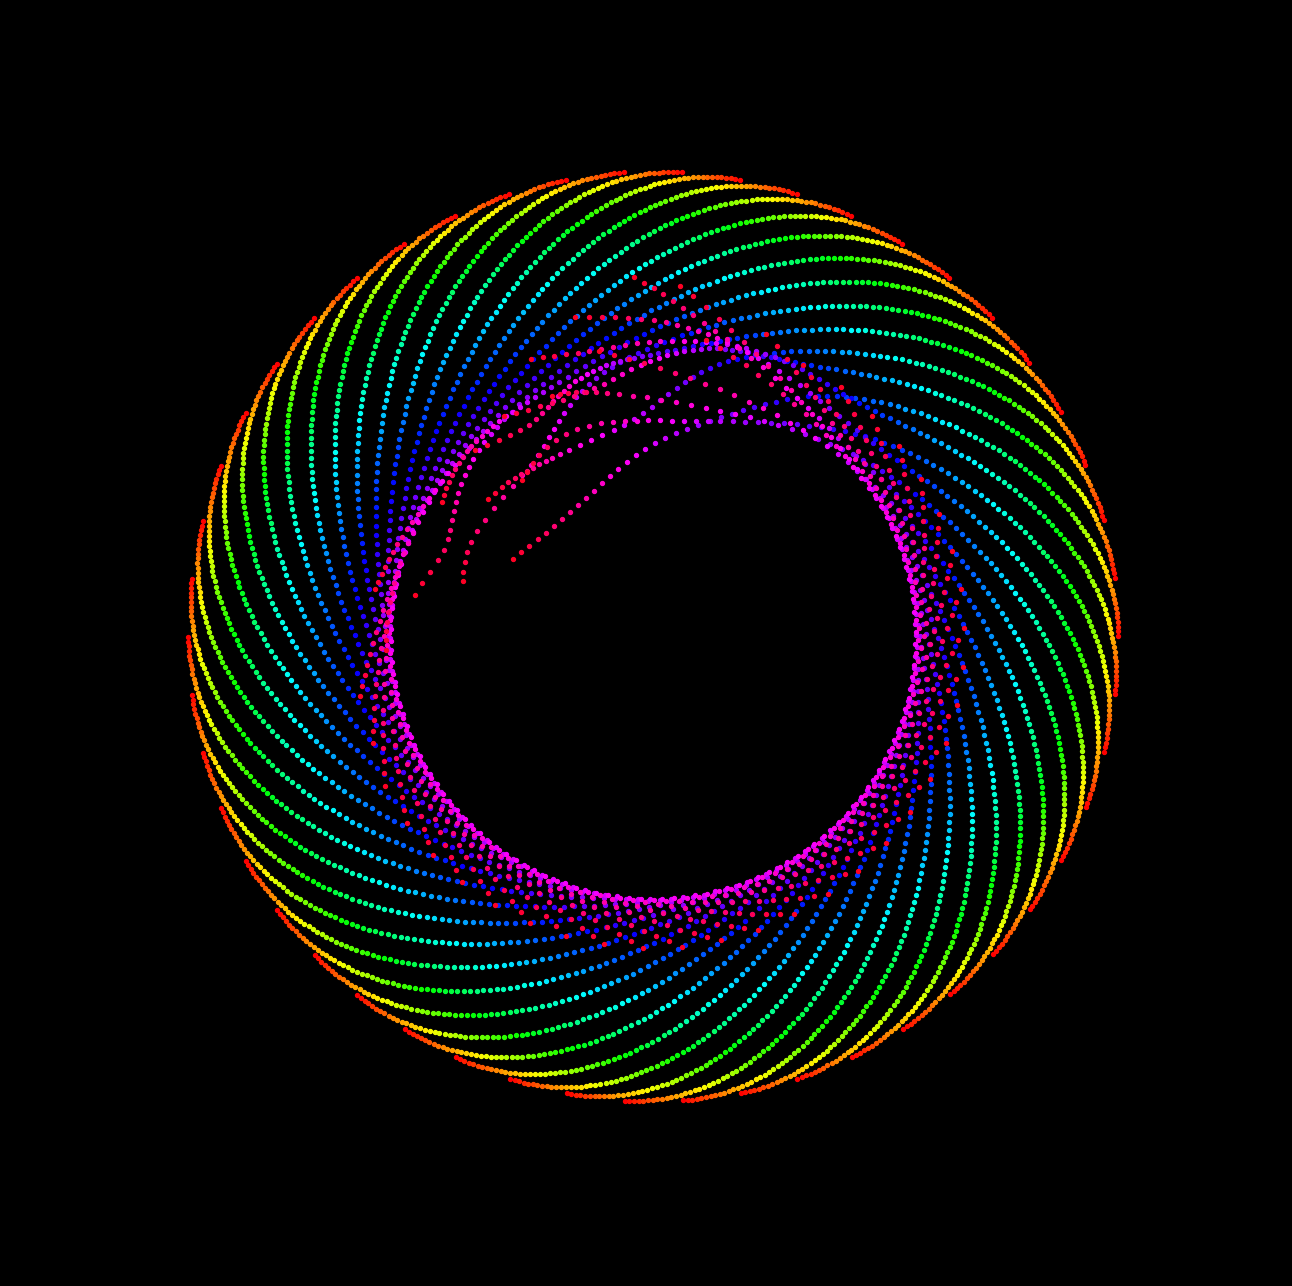

In [6]:
fig = figure(figsize=[16,16], dpi=300, facecolor='black')
axis('off')

alphas = iter(linspace(1,0, len(data)+1))
colors = iter(cm.hsv(linspace(0, 1, len(data)+1)))
ndx = 0
for entry in data: 
    colour = next(colors)
    a = next(alphas)
    for particle_loc in entry:
        scatter(particle_loc[0], particle_loc[1], color=colour, s=8, alpha=a)
    
    if ndx %5 is 0:
        print(str(ndx) + ' / ' + str(len(data)))
    
    # Uncomment to save images to disk at some interval, for use in an animated gif
    #if ndx %5 is 0:
    #    im = fig
    #    im.savefig("gravyteez/" + str(ndx) + ".png", bbox_inches='tight', facecolor='black', edgecolor = 'white', pad_inches=.25)
    ndx+=1
    
xlim(30, 70)
ylim(30, 70)
show()